<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [5]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [17]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [7]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [8]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [9]:
print(boston_df.head(10))

   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0   
5           5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0   
6           6  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0   
7           7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0   
8           8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0   
9           9  0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7 

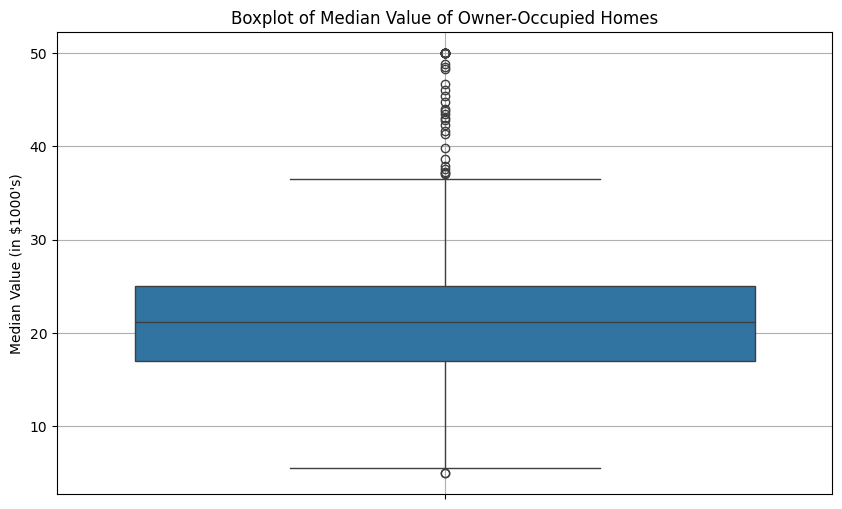

In [10]:
# Create a boxplot for the "Median value of owner-occupied homes"

pyplot.figure(figsize=(10, 6))
sns.boxplot(y=boston_df['MEDV'])
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes')
pyplot.ylabel("Median Value (in $1000's)")
pyplot.grid(True)
pyplot.show()

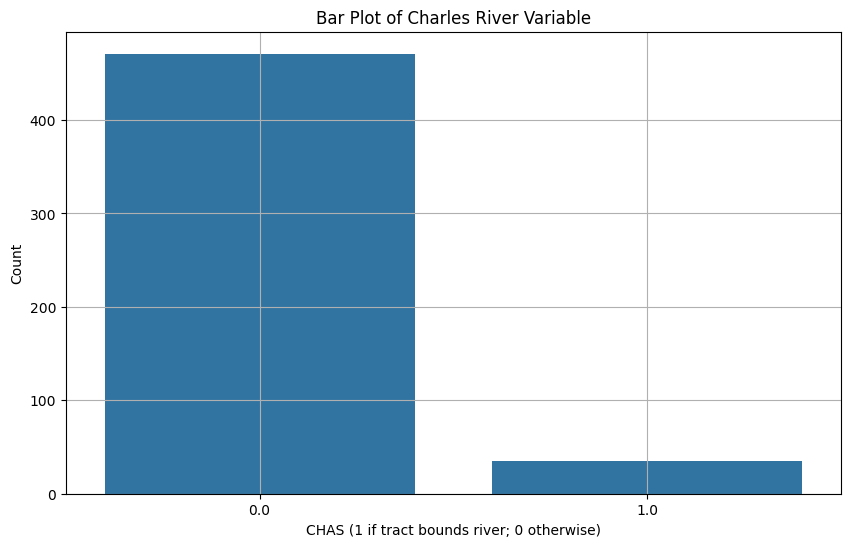

In [11]:
#Provide a bar plot for the Charles river variable

 # Count the occurrences of each value in the CHAS column
charles_river_counts = boston_df['CHAS'].value_counts()
 
# Create a bar plot for the Charles River variable
pyplot.figure(figsize=(10, 6))
sns.barplot(x=charles_river_counts.index, y=charles_river_counts.values)
pyplot.title('Bar Plot of Charles River Variable')
pyplot.xlabel('CHAS (1 if tract bounds river; 0 otherwise)')
pyplot.ylabel('Count')
pyplot.grid(True)
pyplot.show()

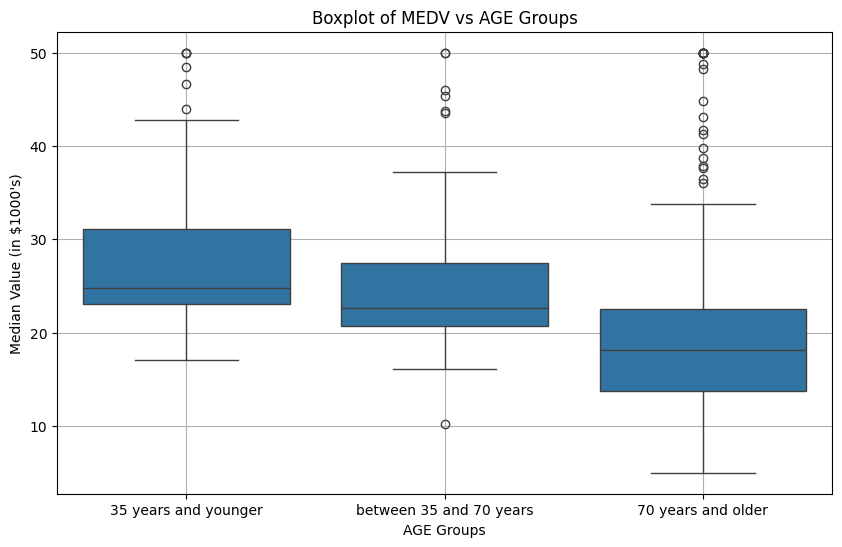

In [12]:
#Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

 
# Discretize the AGE variable into three groups
age_groups = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])

 # Create a boxplot for the MEDV variable vs the AGE variable
pyplot.figure(figsize=(10, 6))
sns.boxplot(x=age_groups, y=boston_df['MEDV'])
pyplot.title('Boxplot of MEDV vs AGE Groups')
pyplot.xlabel('AGE Groups')
pyplot.ylabel("Median Value (in $1000's)")
pyplot.grid(True)
pyplot.show()

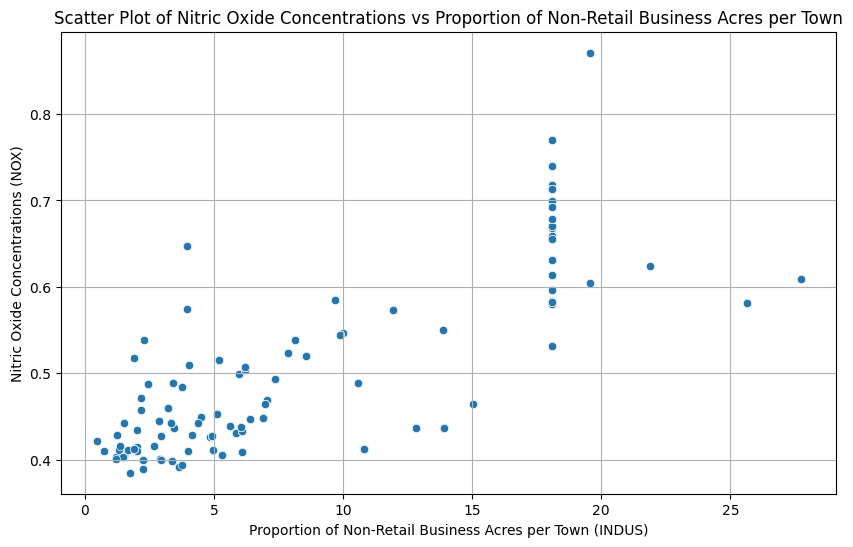

The correlation coefficient between NOX and INDUS is 0.76.


In [13]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

 # Create a scatter plot to show the relationship between NOX and INDUS
pyplot.figure(figsize=(10, 6))
sns.scatterplot(x=boston_df['INDUS'], y=boston_df['NOX'])
pyplot.title('Scatter Plot of Nitric Oxide Concentrations vs Proportion of Non-Retail Business Acres per Town')
pyplot.xlabel('Proportion of Non-Retail Business Acres per Town (INDUS)')
pyplot.ylabel('Nitric Oxide Concentrations (NOX)')
pyplot.grid(True)
pyplot.show()
 
# Print the correlation coefficient
correlation_coefficient = boston_df['INDUS'].corr(boston_df['NOX'])
print(f"The correlation coefficient between NOX and INDUS is {correlation_coefficient:.2f}.")

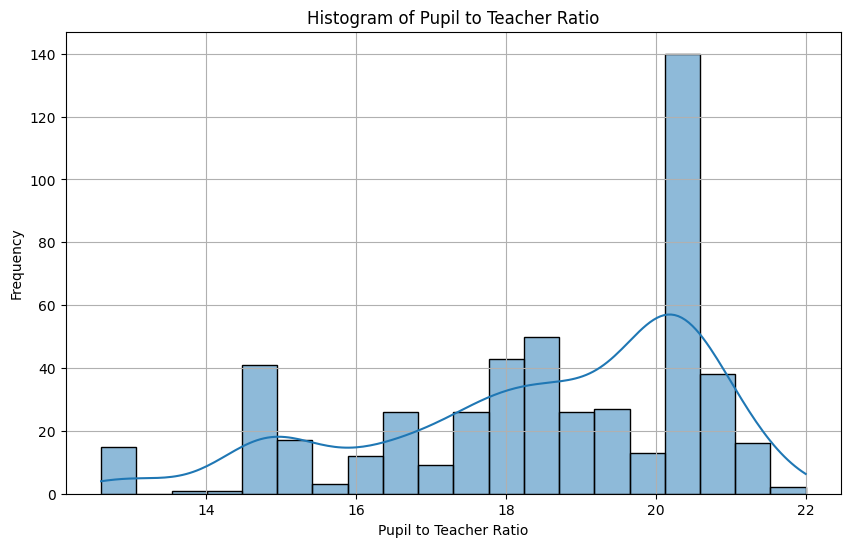

In [14]:

# Create a histogram for the pupil to teacher ratio variable
pyplot.figure(figsize=(10, 6))
sns.histplot(boston_df['PTRATIO'], bins=20, kde=True)
pyplot.title('Histogram of Pupil to Teacher Ratio')
pyplot.xlabel('Pupil to Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.grid(True)
pyplot.show()

 

In [15]:
#• Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

#Hypothesis: 

#H0: There is no significant difference in median value of houses bounded by the Charles river.
#H1: There is a significant difference in median value of houses bounded by the Charles river.

 
# Perform the T-test
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
t_stat, p_value = stats.ttest_ind(chas_0, chas_1)
 

print(f"T-test results: t-statistic = {t_stat:.2f}, p-value = {p_value:.2f}")

print("p-value is less than 0.05. Reject the null hypothesis. There is a significant difference in median value of houses bounded by the Charles river")

<class 'NameError'>: name 'stats' is not defined

In [ ]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

#H0: There is no difference in Median values of houses for each proportion of owner-occupied units built prior to 1940.
#H1: There is a difference in Median values of houses for each proportion of owner-occupied units built prior to 1940.

 
# Discretize the AGE variable into three groups
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])

 
# Perform ANOVA
anova_model = ols('MEDV ~ AGE_group', data=boston_df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
 

print("\nANOVA results:")
print(anova_table)
 

print ("As PR(>F) is greater that 0.05 -> Fail to reject the null hypothesis. There is no difference in Median values of houses for each proportion of owner-occupied units built prior to 1940")

In [ ]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

 
#H0: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
#H1: There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

 

# Perform Pearson Correlation
correlation_coefficient, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])


print(f"\nPearson Correlation results: correlation coefficient = {correlation_coefficient:.2f}, p-value = {p_value:.2f}")

 
print("As p value is less than 0.05 -> Reject the null hypothesis. There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")

In [ ]:
#What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

#H0: There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes.
#H1: There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes.

  
regression_model = ols('MEDV ~ DIS', data=boston_df).fit()
print("\nRegression Analysis results:")
print(regression_model.summary())
print ("Reject the null hypothesis. There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes.")